In [2]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad ,tplquad
from scipy.special import roots_legendre

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Orly de Jesus Rivera Cruz
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






-------------------------------------------------------------------------------------
-------------------------------------Punto #1----------------------------------------
-------------------------------------------------------------------------------------

----------------------------------------------
Calculo de errores con nuestra primera función
----------------------------------------------


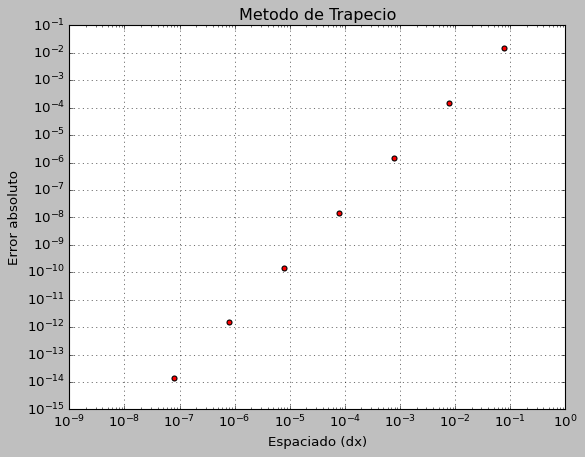


Podemos darnos cuenta que con el metodo Trapezoid el error
baja a medida nuestro espaciado 'dx' va bajando hasta que llega
un punto donde la maquina redondea el resultado a 0 por tener un
error tan pequeño.



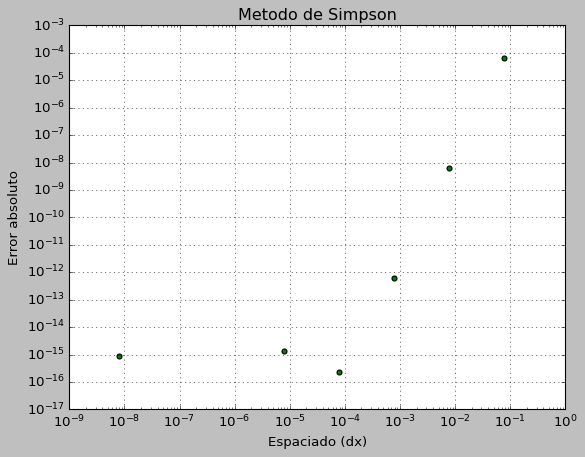


En el metodo de Simpson nos damos cuenta que su error baja
mas rapido, esto debido a tener una convergencia mas rapida pero esto
lleva a que mas rapido se avisten los errores de redondeo como en trapezoid
donde redondea a cero y despues empieza a crecer el error.

----------------------------------------------
Calculo de errores con nuestra segunda función
----------------------------------------------


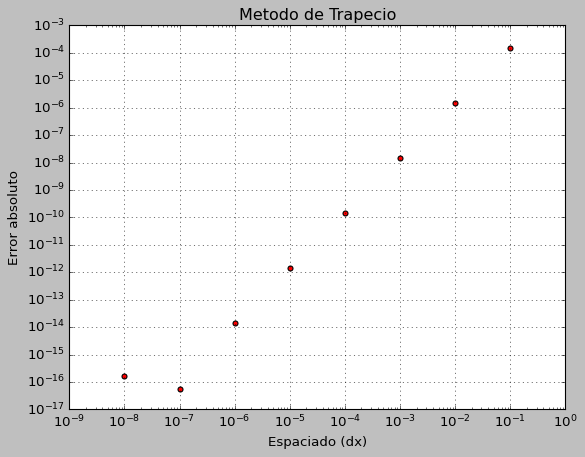


Al igual que la anterior función el metodo Trapezoid baja hasta que
redondea, pero en este caso podemos darnos cuenta como el ultimo valor da
un error de redondeo por tomar un espaciado tan pequeño.



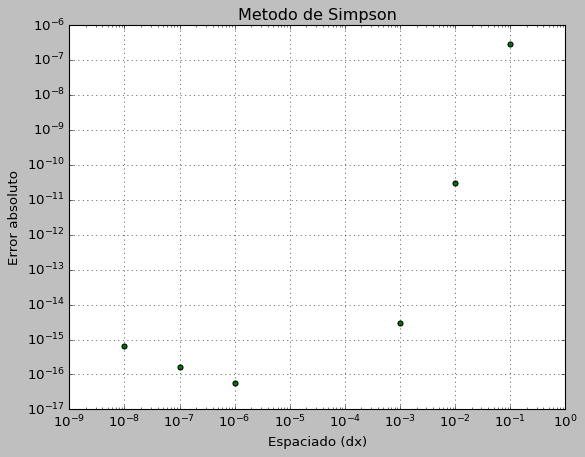


Al igual que la anterior función el metodo Simpson decrece rapidamente
pero en esta incluso hay errores de redondeo mas rapido, probablemente por el bajo
valor que presenta la integral por lo que hay mas errores de redondeo.

-------------------------------------------------------------------------------------
-------------------------------------Punto #2----------------------------------------
-------------------------------------------------------------------------------------


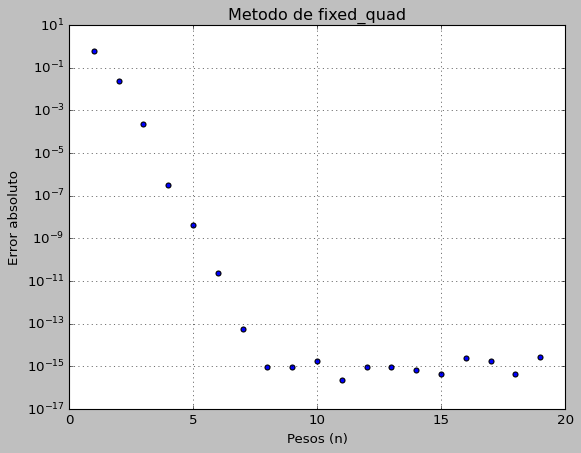


En nuestra primera función podemos ver que entre mas aumenta
el numero de puntos mas se acerca el metodo fixed_quad al valor hasta que
llega a un punto donde se vuelve un poco inestable pero sin explotarse.


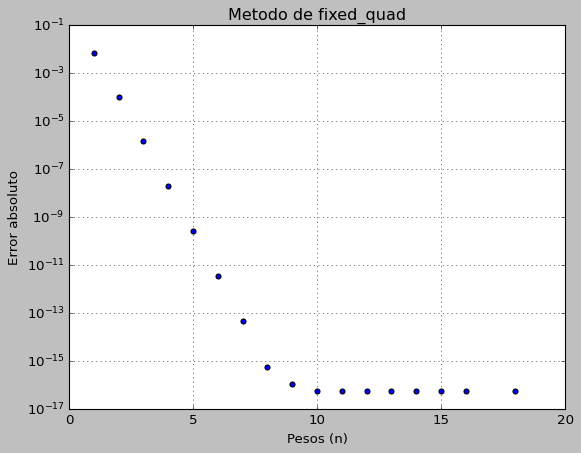


Al igual que la anterior función, el metodo fixed_quad
se acerca entre mas aumenta el numero de puntos sin presentar errores
aunque mas controladamente y estable, incluso llega un punto donde redondea a 0.


In [3]:
# --- Problema 1 ---

print("-------------------------------------------------------------------------------------")
print("-------------------------------------Punto #1----------------------------------------")
print("-------------------------------------------------------------------------------------")

print()

Funcion_1 = lambda x : np.exp(3*x) * np.sin(x)                    #Primera función a integrar
Funcion_2 = lambda x : 1 / (x*np.log(x))                          #Segunda función a integrar

Funciones = [Funcion_1 , Funcion_2]

Integral_1 , _ = quad(Funcion_1 , 0 , np.pi/4)                    #Valores "exactos" tomados de el metodo quad
Integral_2 , _ = quad(Funcion_2 , np.e , np.e + 1)                  

Integrales = [Integral_1 , Integral_2]       

Intervalo_1 = [0 , np.pi/4]                                       #Intervalos a integrar nuestros funciones
Intervalo_2 = [np.e , np.e + 1]

Intervalos = [Intervalo_1 , Intervalo_2]

NumDeInt = np.logspace(1,8,8)                                     #Numero de divisiones de nuestro intervalo de integracion


for i in [0,1]:                                                            #Recurro al "for" para no tener que copiar el codigo dos veces 

    Errores_s = list()                                                     #Listas para guardar informacion necesaria para los graficos
    Errores_t = list()
    Espaciados = list()

    if i == 0:                                                             #Titulo de las graficas
        print("----------------------------------------------")
        print("Calculo de errores con nuestra primera función")
        print("----------------------------------------------")
    else:
        print("----------------------------------------------")
        print("Calculo de errores con nuestra segunda función")
        print("----------------------------------------------")
    
    for n in NumDeInt:                                                                #Uso de el "for" para evaluar diferentes espaciados "dx" entre puntos
        Espaciado = (Intervalos[i][1] - Intervalos[i][0]) / (n)                       #Calculo de nuestro espaciado "dx"

        Intervalox = np.linspace(Intervalos[i][0], Intervalos[i][1], int(n) + 1)      #Array de puntos de la función
        Intervaloy = Funciones[i]( Intervalox )

        s = simpson(Intervaloy , dx=Espaciado)                                        #Uso de los metodos numericos
        t = trapezoid(Intervaloy , dx=Espaciado)

        Errors = abs(s-Integrales[i])                                                 #Calculo de sus errores respectivamente
        Errort = abs(t-Integrales[i])    
        Espaciados.append(Espaciado)                                                  #Almacenamiento de información necesaria para los graficos
        Errores_s.append(Errors)
        Errores_t.append(Errort)

    plt.style.use("classic")                                               #Uso del estilo por mera estética    

    plt.scatter(Espaciados , Errores_t , c = "red")                        #Errores de Simpson en función a su espaciado "dx"

    plt.title("Metodo de Trapecio")                                        #Informacion de la grafica
    plt.xscale('log')
    plt.yscale('log')


    plt.xlabel("Espaciado (dx)")
    plt.ylabel("Error absoluto")
    plt.grid()
    plt.show()

    if i == 0:                                                                        #Analisis sobre el metodo Trapezoid en cada grafica
        print("\nPodemos darnos cuenta que con el metodo Trapezoid el error\n" \
        "baja a medida nuestro espaciado 'dx' va bajando hasta que llega\n" \
        "un punto donde la maquina redondea el resultado a 0 por tener un\n" \
        "error tan pequeño.\n")
    else:
        print("\nAl igual que la anterior función el metodo Trapezoid baja hasta que\n" \
        "redondea, pero en este caso podemos darnos cuenta como el ultimo valor da\n" \
        "un error de redondeo por tomar un espaciado tan pequeño.\n")

    #------------------------------------------------------


    plt.scatter(Espaciados , Errores_s , c="green")                        #Errores de Trapezoid en función a su espaciado "dx"

    plt.title("Metodo de Simpson")                                         #Informacion de la grafica
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Espaciado (dx)")
    plt.ylabel("Error absoluto")
    plt.grid()
    plt.show()

    if i == 0:                                                                        #Analisis sobre el metodo Trapezoid en cada grafica
        print("\nEn el metodo de Simpson nos damos cuenta que su error baja\n" \
        "mas rapido, esto debido a tener una convergencia mas rapida pero esto\n" \
        "lleva a que mas rapido se avisten los errores de redondeo como en trapezoid\n" \
        "donde redondea a cero y despues empieza a crecer el error.\n")
    else:
        print("\nAl igual que la anterior función el metodo Simpson decrece rapidamente\n" \
        "pero en esta incluso hay errores de redondeo mas rapido, probablemente por el bajo\n" \
        "valor que presenta la integral por lo que hay mas errores de redondeo.\n")

print("-------------------------------------------------------------------------------------")
print("-------------------------------------Punto #2----------------------------------------")
print("-------------------------------------------------------------------------------------")

for i in [0,1]:                                                                     #Utilizamos este "for" para no tener que repetir el codigo
    Erroresq = list()                                                               #Lista para guardar nuestros errores
    for m in range(1,20):
        fq , _ = fixed_quad(Funciones[i],Intervalos[i][0],Intervalos[i][1],n=m)         #Calculamos variando los numeros de puntos
        Errorq = abs(fq - Integrales[i])                                                #Error usando "quad" como valor exacto
        Erroresq.append(Errorq)                                                         #Almacenamso el error

    plt.scatter(range(1,20) , Erroresq , c="blue")                                  #Errores de fixed_quad en función a su numero de puntos "n"

    plt.title("Metodo de fixed_quad")                                               #Informacion de la grafica
    plt.yscale('log')
    plt.xlabel("Pesos (n)")
    plt.ylabel("Error absoluto")
    plt.grid()
    plt.show()
    if i == 0:                                                                      #Analisis sobre el metodo fixed_quad en cada grafica
        print("\nEn nuestra primera función podemos ver que entre mas aumenta\n" \
        "el numero de puntos mas se acerca el metodo fixed_quad al valor hasta que\n" \
        "llega a un punto donde se vuelve un poco inestable pero sin explotarse.")
    else:
        print("\nAl igual que la anterior función, el metodo fixed_quad\n" \
        "se acerca entre mas aumenta el numero de puntos sin presentar errores\n" \
        "aunque mas controladamente y estable, incluso llega un punto donde redondea a 0.")


#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [4]:
# --- Problema 2 ---

#   Integral con iteraciones de quad

def Integral_interna( x , y ):                                          #La integral de salida sera una funcion de x , y
    f = lambda z : (1/y)*(np.sin(z/y))                                  #Definimos la función en z
    i , _ = quad(f , 0 , x*y)                                           #Integramos con respecto a z en el intervalo (0 , xy)
    return i

def Integral_Intermedia(x):                                             #La integral de salida sera una funcion en x
    f = lambda y : Integral_interna(x , y)                              #Definimos la integral interna en y
    i , _ = quad(f , 0 , x)                                             #Integramos con rescpeto a y en el intervalo (0 , x)
    return i

Integral_quad , _ = quad(Integral_Intermedia , 0 , np.pi)                    #Integramos la integral intermedia con respescto a x en el intervalo (0,pi)

#   Integral con tplquad

g = lambda z , y , x: (1/y)*(np.sin(z/y))   

Integral_tplquad , _ = tplquad(g , 0 , np.pi, lambda x : 0 , lambda x : x , lambda x , y: 0 , lambda x , y: x*y)   #Usamos tplquad con sus respectivos intervalos

print("La integral con iteraciones de quad es:" , Integral_quad , "\nLa integral con tplquad es:" , Integral_tplquad)

print("\nPodemos darnos cuenta que son resultados iguales")
print("¿Integral_quad == Integral_tplquad?   =   " , Integral_quad == Integral_tplquad )


La integral con iteraciones de quad es: 6.934802200544679 
La integral con tplquad es: 6.934802200544679

Podemos darnos cuenta que son resultados iguales
¿Integral_quad == Integral_tplquad?   =    True


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [5]:
# --- Problema 3 ---

def gauss_quad_standard_modificada(func , a , b , n=4):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).
    - a: Intervalo inferior
    - b: Intervalo superior

    Returns:
    - Aproximación de la integral.

    """
    # Obtener raíces y pesos del polinomio de Legendre

    r, w = roots_legendre(n)

    # Evaluar la suma ponderada

    integral = 0

    #Recurrimos a un for para que no haya errores por ingresar arrays a funciones tipo lambda

    for i in range(n):
        integral += w[i] * func(   ((b-a)/2)*r[i]   +   ((b+a)/2)   ) #Al realizar el cambio de variable x = (b-a)/2)*t + ((b+a)/2
    integral *= ((b-a)/2) 

    return integral

#   Integral con iteraciones de quad

def Integral_interna( x , y ):                                          #La integral de salida sera una funcion de x , y
    f = lambda z : (1/y)*(np.sin(z/y))                                  #Definimos la función en z
    i = gauss_quad_standard_modificada(f , 0 , x*y)                     #Integramos con respecto a z en el intervalo (0 , xy)
    return i

def Integral_Intermedia(x):                                             #La integral de salida sera una funcion en x
    f = lambda y : Integral_interna(x , y)                              #Definimos la integral interna en y
    i = gauss_quad_standard_modificada(f , 0 , x)                       #Integramos con rescpeto a y en el intervalo (0 , x)
    return i

Integral_gauss = gauss_quad_standard_modificada(Integral_Intermedia , 0 , np.pi)    #Integramos la integral intermedia con respescto a x en el intervalo (0,pi)

print("La integral de el problema #2 usando cuadratura gaussiana es:",Integral_gauss)

La integral de el problema #2 usando cuadratura gaussiana es: 6.934912397233501


#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dydx}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [6]:
# --- Problema 4 ---

#Primera integral

f = lambda x : 1 / ((np.tan(x))**(1/2))
# x = t**2   ,    dx   =    2t * dt
g = lambda x : (2*x) / (np.tan(x**2))**(1/2) #Se usa un cambio de variable para cuadratura gaussiana para mejorar su velocidad de convergencia

integral_real_1 = quad(f , 0 , np.pi/2)[0]

for n in np.arange(10 , 100000 , 10):
    x = np.linspace(1e-5 , np.pi/2 , n)
    y = f(x)
    
    integral_trapezoid_1 = trapezoid( y , x )
    if abs( integral_trapezoid_1 - integral_real_1 ) < 1e-5:
        print("      Trapezoid      : La integral #1 converge con",n,"divisiones al valor :",integral_trapezoid_1)
        break
    else:
        pass

for n in np.arange(10 , 100000 , 10):
    x = np.linspace(1e-5 , np.pi/2 , n)
    y = f(x)
    
    integral_simpson_1 = simpson( y , x )
    if abs( integral_simpson_1 - integral_real_1 ) < 1e-5:
        print("       Simpson       : La integral #1 converge con",n,"divisiones al valor  :",integral_simpson_1)
        break
    else:
        pass

for n in np.arange(1,100):

    integral_quad_1 , _ = fixed_quad( g , 0 , (np.pi/2)**(1/2) , n = n)

    if abs( integral_quad_1 - integral_real_1 ) < 1e-5:
        print("Cuadratura Gaussiana : La integral #1 converge con",n,"raices al valor        :",integral_quad_1)
        break
    else:
        pass


#Segunda integral

f = lambda x : np.cos(x) / x**3
# x = 1/t   ,    dx   =   -dt/t**2
g = lambda x : x*np.cos(1/x) #Se usa un cambio de variable para todos los metodos por velocidad de convergencia

integral_real_2 = quad(f , 1 , 500)[0]

for n in np.arange(10 , 100000 , 10):
    x = np.linspace(1e-5 , 1 , n)
    y = g(x)
    
    integral_trapezoid_2 = trapezoid( y , x )
    if abs( integral_trapezoid_2 - integral_real_2 ) < 1e-5:
        print("\n      Trapezoid      : La integral #2 converge con",n,"divisiones al valor :",integral_trapezoid_2)
        break
    else:
        pass

for n in np.arange(10 , 100000 , 10):
    x = np.linspace(1e-5 , 1 , n)
    y = g(x)
    
    integral_simpson_2 = simpson( y , x )
    if abs( integral_simpson_2 - integral_real_2 ) < 1e-5:
        print("       Simpson       : La integral #2 converge con",n,"divisiones al valor :",integral_simpson_2)
        break
    else:
        pass

for n in np.arange(1,100):

    integral_quad_2 , _ = fixed_quad( g , 0 , 1 , n = n)

    if abs( integral_quad_2 - integral_real_2 ) < 1e-5:
        print("Cuadratura Gaussiana : La integral #2 converge con",n,"raices al valor      :",integral_quad_2)
        break
    else:
        pass


#Tercera integral

#integral_real_3 = quad(f , 1 , 500)[0]

def integral_interna_3(x , n):
    f = lambda y : 1 / ((1-(y)**2)**(1/2))

    PreIma = np.linspace(0 , np.sin(x) , n)
    Ima = f(PreIma)
    return trapezoid(Ima , PreIma)

for n in range(1,1000,10):
    PreIma = np.linspace(0 , np.pi/4 , n)
    Ima = [integral_interna_3(x,n) for x in PreIma]

    if abs(trapezoid(Ima , PreIma) - (np.pi**2 / 32)) < 1e-5:
        print("\n      Trapezoid      : La integral #3 converge con",n,"divisiones al valor :",trapezoid(Ima , PreIma))
        break
    else:
        pass


def integral_interna_3(x , n):
    f = lambda y : 1 / ((1-(y)**2)**(1/2))

    PreIma = np.linspace(0 , np.sin(x) , n)
    Ima = f(PreIma)
    return simpson(Ima , PreIma)

for n in range(1,1000,10):
    PreIma = np.linspace(0 , np.pi/4 , n)
    Ima = [integral_interna_3(x,n) for x in PreIma]

    if abs(simpson(Ima , PreIma) - (np.pi**2 / 32)) < 1e-5:
        print("       Simpson       : La integral #3 converge con",n,"divisiones al valor :",simpson(Ima , PreIma))
        break
    else:
        pass



def integral_interna_3(x , n):                  #Usamos mi funcion para poder ir valor por valor y que no se explote por recibir un array
    f = lambda y : 1 / ((1-(y)**2)**(1/2))
    return gauss_quad_standard_modificada(f , 0 , np.sin(x) , n = n)

def integral_total_3(n):    
    for i in n:
        f = lambda x : integral_interna_3(x,i)
        if abs(gauss_quad_standard_modificada(f , 0 , np.pi/4) - (np.pi**2 / 32)) < 1e-5:
            return print("Cuadratura Gaussiana : La integral #3 converge con",i,"raices al valor      :",fixed_quad(f , 0 , np.pi/4)[0])
        else:
            pass

integral_total_3(np.arange(1,100))



      Trapezoid      : La integral #1 converge con 15610 divisiones al valor : 2.2214476276616604
       Simpson       : La integral #1 converge con 9650 divisiones al valor  : 2.2214455078197557
Cuadratura Gaussiana : La integral #1 converge con 39 raices al valor        : 2.221450780445511

      Trapezoid      : La integral #2 converge con 120 divisiones al valor : 0.01811824527659652
       Simpson       : La integral #2 converge con 300 divisiones al valor : 0.018118466151026753
Cuadratura Gaussiana : La integral #2 converge con 43 raices al valor      : 0.01811686135686515

      Trapezoid      : La integral #3 converge con 41 divisiones al valor : 0.3084331374840011
       Simpson       : La integral #3 converge con 11 divisiones al valor : 0.30842614153913456
Cuadratura Gaussiana : La integral #3 converge con 4 raices al valor      : 0.30842448676617523
